# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [1]:
# Get the datasets
!curl.exe --output train.dat http://huang.eng.unt.edu/CSCE-5218/train.dat
!curl.exe --output test.dat http://huang.eng.unt.edu/CSCE-5218/test.dat

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 11244  100 11244    0     0  99738      0 --:--:-- --:--:-- --:--:--   98k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2844  100  2844    0     0  41301      0 --:--:-- --:--:-- --:--:-- 43090


In [4]:
# Take a peek at the datasets
!head train.dat
!head test.dat

'head' is not recognized as an internal or external command,
operable program or batch file.
'head' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
type(train.dat)

NameError: name 'train' is not defined

### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [63]:
## Test code to see if the sum-zip method I found in a few places could handle the dot product of a 1x3 and a 3x1 to prove a point to myslef about how it's definitely not going to work and I need to find another more general approach outside of numpy that would lead to about 40 minutes wasted :)
array1 = [1, 2, 3]
array2 = [[4], [5], [6]]


dot_product = sum(x * y for x, y in zip(array1, array2))

print("Dot product:", dot_product)

TypeError: unsupported operand type(s) for +: 'int' and 'list'

In [12]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    return sum(a * b for a, b in zip(array1, array2))


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return 1/(1+math.exp(-x))

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weights, instance):
    #TODO: return the output of the model 
    return sigmoid(dot_product(weights, instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    return 1 if output(weights, instance) >= 0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    #Weight initialization
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            #Prediction and error calculation
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #TODO: name these steps
            #Updating weights
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [13]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)
The predict function only returns a 1 or 0. The purpose of that section of code if for updating the weights using the gradient of the error and the learning rate. With that in mind, we can have more effective weight updates if we can include our uncertainty of each prediction into the error. By comparing the correct value with the sigmoid output, we can get a better idea of how far off or how close our prediction was and make updates more precisely than if every wrong prediction simply had an error of 1.

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 

The code below was already there (I didn't write it (I only indented the print line a lil)(and added a models parameter dataset)) and it appears to answer the question correctly and in its entirety. I'm at a loss as to what's expected of me here.

In [18]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

models = []

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      models.append([tr_size, epochs, lr, accuracy])
      print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
              f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  20, lea

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)

##### A:
No, in this assignment a model with only 75% of the training data that reached the highest accuracy observed (80%) which tied with four other models trained on the full training set. That being said, the plots below and the previously mentioned metric of four of the five best models using the full the training set, suggest that more training data will likely lead to a higher accuracy.
##### B:
In this instance I would say it got worse accuracy because of two reasons. Even though the second model had more training data, the learning rate was an order smaller. While both learning rates may both be able to converge on the same optimal solution eventually, this particular case didn't allow for that due to the second problem. The limited epoch size. Had both models continued training on their respective datasets it's likely second model's accuracy would eventually meet and surpass the first model's accuracy. Here's what we observed as the epochs inreased,

```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 70.0
#tr: 100, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 74.0
#tr: 100, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 77

#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 67.0
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 74
```

##### C:
No, not that I know of. Looking at the code for the perceptron model, it looks like epochs and learning rate would be the only hyperparameters. The training dataset size was technically a hyperparameter, but the more training data the better so we would leave that alone. I don't think there are any additional hyperparameters that can be used here to increase the accuracy
##### D:
No, it is not always worth training for more epochs! In almost every instance of training machine or deep learning models there will come a time in the training process when the model begins to overfit on the training data. Harming the models accuracy on the test data. That's why many training procedures include versions od early stopping that freezes the parameters to the most optimal recent values if certain conditions are met. Conditions indicative of overtraining and/or test accuracy plateaus.
```

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

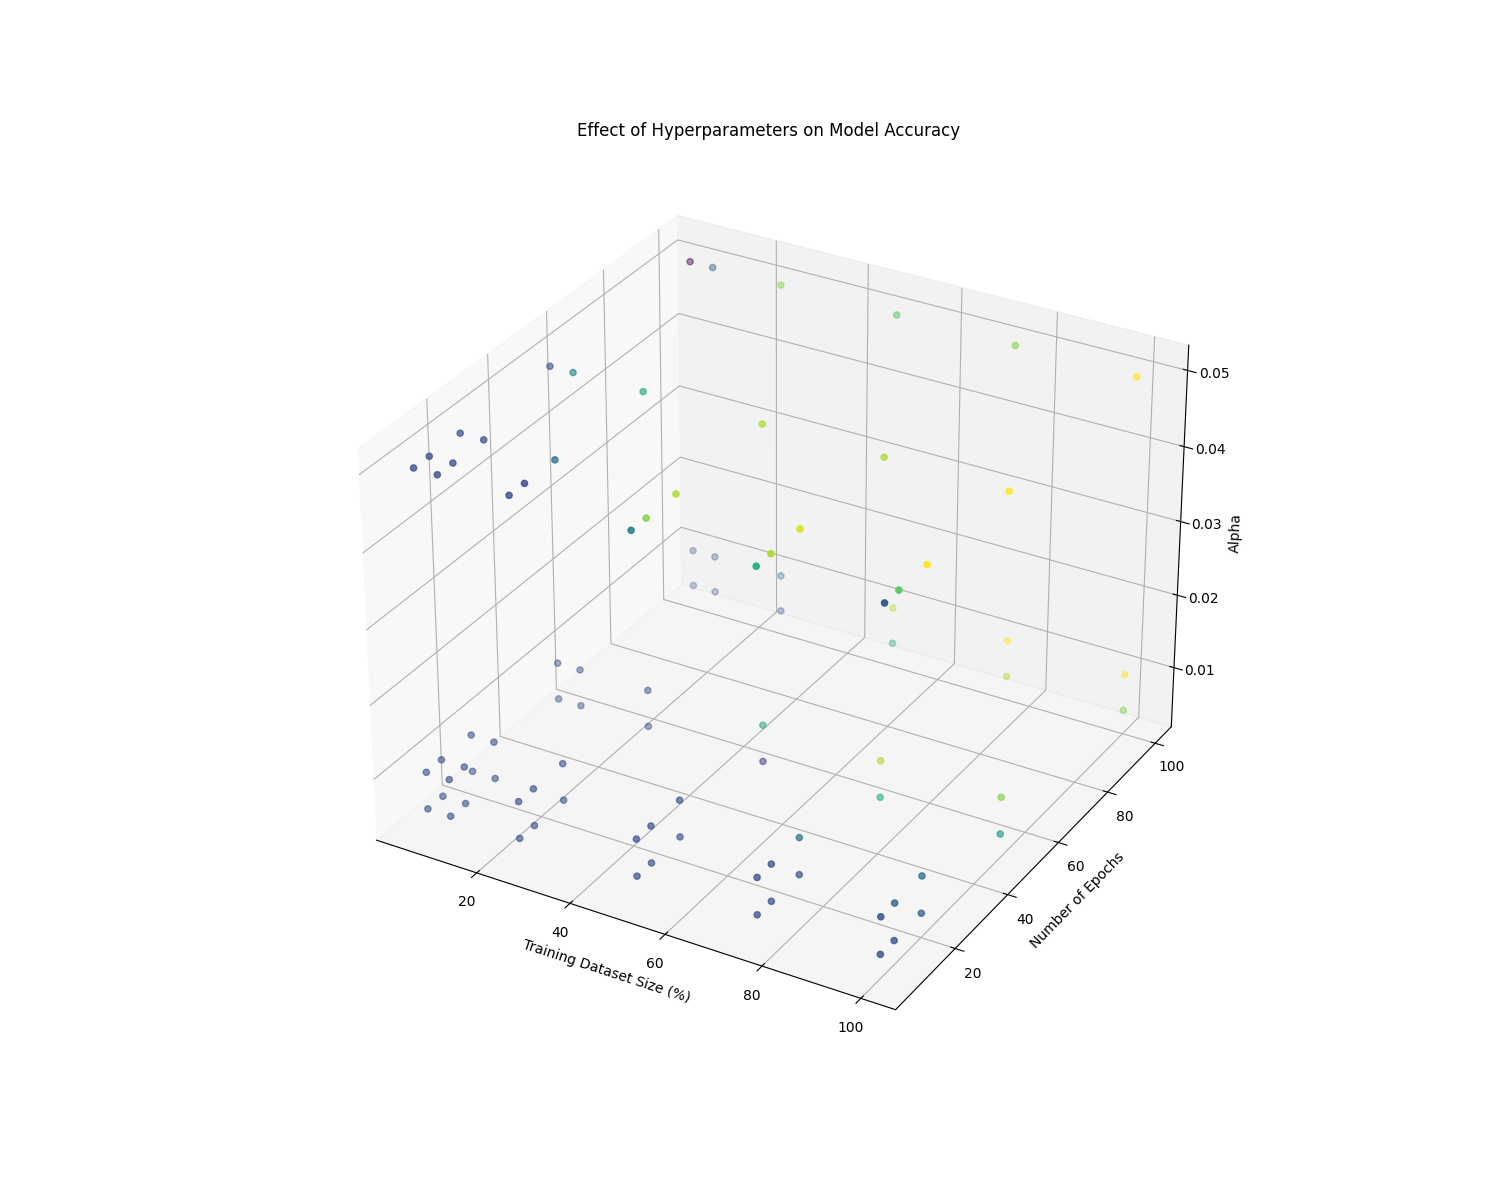

In [60]:
%matplotlib widget
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter([entry[0] for entry in models], 
           [entry[1] for entry in models], 
           [entry[2] for entry in models], 
           c=[entry[3] for entry in models], cmap='viridis')

ax.set_xlabel('Training Dataset Size (%)')
ax.set_ylabel('Number of Epochs')
ax.set_zlabel('Alpha')
ax.set_title('Effect of Hyperparameters on Model Accuracy')
plt.show()

In [41]:
tr_size = [entry[0] for entry in models]
epochs = [entry[1] for entry in models]
alpha = [entry[2] for entry in models]
acc = [entry[3] for entry in models]

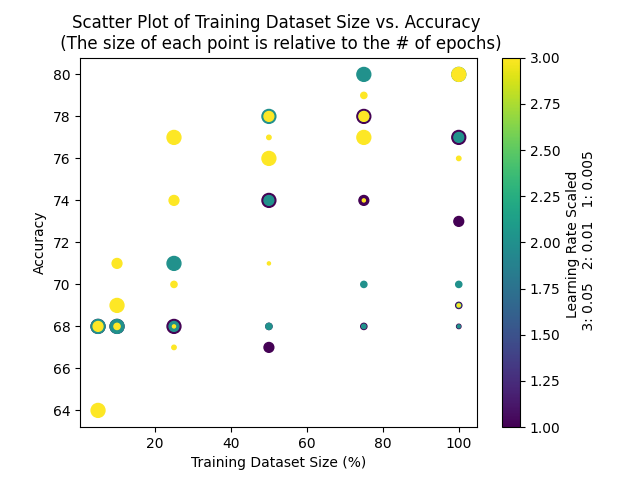

In [62]:
fig, ax = plt.subplots()

ax.scatter(x=tr_size, y=acc, s = epochs, c=[1 if val < 0.01 else (2 if val < 0.05 else 3) for val in alpha] )
ax.set_xlabel('Training Dataset Size (%)')
ax.set_ylabel('Accuracy')
ax.set_title('Scatter Plot of Training Dataset Size vs. Accuracy \n (The size of each point is relative to the # of epochs)')
plt.colorbar(ax.collections[0], label='Learning Rate Scaled \n 3: 0.05   2: 0.01   1: 0.005')  
plt.show()